#### Step 1: Import all the necessary libraries. All your imports should be here and here only (2 marks)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Step 2: Read the csv file and display the first few rows (2 marks)

In [2]:
df = pd.read_csv('movie.csv')

In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


 #### Step 3: Get to know your datasets. Check total number of rows and columns, what are the different columns and datatypes. Count the total of individual target and visualize it. (5 marks)


In [4]:
df.shape

(40000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


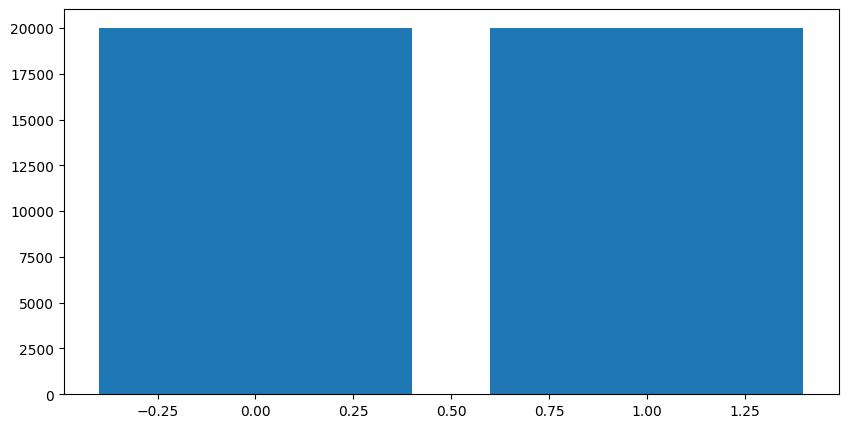

In [19]:
plt.figure(figsize=(10,5))
plt.bar(df.label.value_counts().keys(), df.label.value_counts())
plt.show()

In [17]:
df.label.value_counts()

,count
label,
0,20019
1,19981


#### Step 4: Data Pre-processing. Load stopwords and remove them from your dataset. (3 marks)

In [21]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(filtered_words)

df['cleaned_text'] = df['text'].apply(remove_stopwords)
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                text  \
0  I grew up (b. 1965) watching and loving the Th...   
1  When I put this movie in my DVD player, and sa...   
2  Why do people who do not know what a particula...   
3  Even though I have great interest in Biblical ...   
4  Im a die hard Dads Army fan and nothing will e...   

                                        cleaned_text  
0  grew ( b . 1965 ) watching loving Thunderbirds...  
1  put movie DVD player , sat coke chips , expect...  
2  people know particular time past like feel nee...  
3  Even though great interest Biblical movies , b...  
4  Im die hard Dads Army fan nothing ever change ...  


#### Step 5: Step 4: Separate the positive sentiment reviews from negative? (2 marks)

In [22]:
positive_reviews = df[df['label'] == 1]
negative_reviews = df[df['label'] == 0]

print("Positive Reviews:")
print(positive_reviews.head())

print("\nNegative Reviews:")
print(negative_reviews.head())

Positive Reviews:
                                                 text  label  \
4   Im a die hard Dads Army fan and nothing will e...      1   
6   Finally watched this shocking movie last night...      1   
8   It may be the remake of 1987 Autumn's Tale aft...      1   
9   My Super Ex Girlfriend turned out to be a plea...      1   
10  I can't believe people are looking for a plot ...      1   

                                         cleaned_text  
4   Im die hard Dads Army fan nothing ever change ...  
6   Finally watched shocking movie last night , di...  
8   may remake 1987 Autumn 's Tale eleven years , ...  
9   Super Ex Girlfriend turned pleasant surprise ,...  
10  ca n't believe people looking plot film . Laur...  

Negative Reviews:
                                                text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula... 

#### Step 6:Create a word cloud for the positive as well as the negative reviews. What are the most frequent words? (2 marks + 2 marks + 1 marks)

In [25]:
positive_reviews.shape, negative_reviews.shape

((19981, 3), (20019, 3))

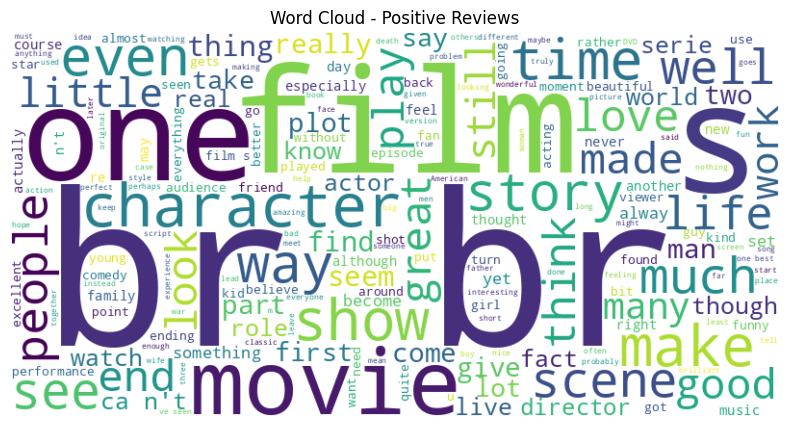

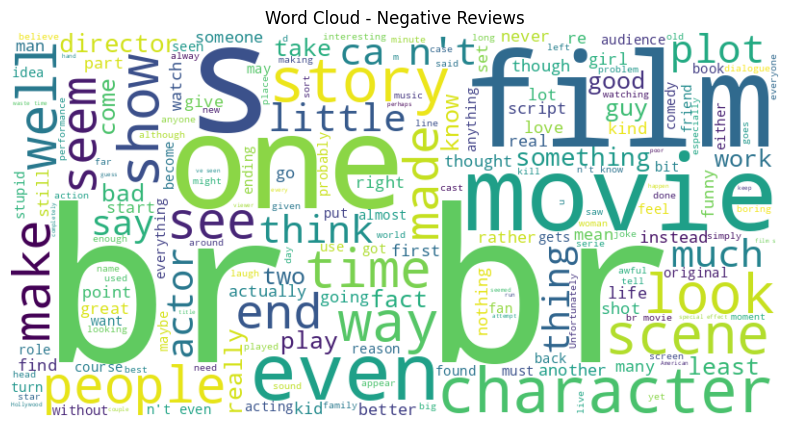

In [23]:
positive_text = ' '.join(positive_reviews['cleaned_text'].tolist())
negative_text = ' '.join(negative_reviews['cleaned_text'].tolist())

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_text, "Word Cloud - Positive Reviews")
generate_wordcloud(negative_text, "Word Cloud - Negative Reviews")

In [26]:
positive_words = positive_text.split()
negative_words = negative_text.split()

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

print("Most Frequent Words in Positive Reviews:")
print(most_common_positive)

print("\nMost Frequent Words in Negative Reviews:")
print(most_common_negative)

Most Frequent Words in Positive Reviews:
[(',', 226301), ('.', 186193), ('/', 78505), ('>', 78414), ('<', 78337), ('br', 78320), ("'s", 50404), ('film', 31967), (')', 29513), ('movie', 29063)]

Most Frequent Words in Negative Reviews:
[(',', 209313), ('.', 188535), ('/', 83344), ('>', 83296), ('<', 83239), ('br', 83142), ("'s", 46784), ('movie', 38168), ("n't", 31569), ('film', 28603)]


#### Step 7: Split the data into train and test dataset in 80:20 ratio. (1 marks)

In [28]:
X = df['cleaned_text']  # Features (text data)
y = df['label']     # Target (sentiment labels)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((32000,), (8000,))

#### Step 8: Load the TfidfVectorizer and fit and transform your train data to it. (2 marks)

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [34]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Step 9: Create logistic regression model and train the transformed trained data(2 marks)

In [35]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Step 10: Evaluate the model by creating a confusion matrix. Visualize it using heat map. (5 marks)

In [36]:
y_pred = logistic_model.predict(X_test_tfidf)

confusion_matrix(y_test, y_pred)

array([[3464,  502],
       [ 432, 3602]])

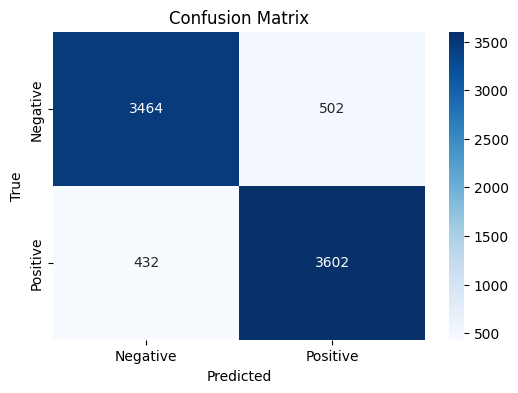

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Step 11: Test your model. Create a bunch of reviews that are both positive and negative. See how your model works. What about when they are neutral in nature? Elaborate. (2 marks + 2 marks + 1 marks + 2 marks)

In [41]:
sample_reviews = [
    "This movie was absolutely fantastic! I loved every moment.",
    "The plot was boring and the acting was terrible.",
    "It was an average film, nothing too special but not bad either.",
    "The visual effects were stunning, but the storyline lacked depth.",
    "I wouldn't recommend this to anyone. It was a waste of time.",
    "One of the best films I've seen this year! A must-watch.",
    "The movie was okay, not too good or bad, just fine.",
    "The script was weak, but the music and visuals were great.",
]

sample_reviews_tfidf = tfidf_vectorizer.transform(sample_reviews)
sample_predictions = logistic_model.predict(sample_reviews_tfidf)

for review, sentiment in zip(sample_reviews, sample_predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("----------")

Review: This movie was absolutely fantastic! I loved every moment.
Predicted Sentiment: 1
----------
Review: The plot was boring and the acting was terrible.
Predicted Sentiment: 0
----------
Review: It was an average film, nothing too special but not bad either.
Predicted Sentiment: 0
----------
Review: The visual effects were stunning, but the storyline lacked depth.
Predicted Sentiment: 0
----------
Review: I wouldn't recommend this to anyone. It was a waste of time.
Predicted Sentiment: 0
----------
Review: One of the best films I've seen this year! A must-watch.
Predicted Sentiment: 1
----------
Review: The movie was okay, not too good or bad, just fine.
Predicted Sentiment: 0
----------
Review: The script was weak, but the music and visuals were great.
Predicted Sentiment: 0
----------
